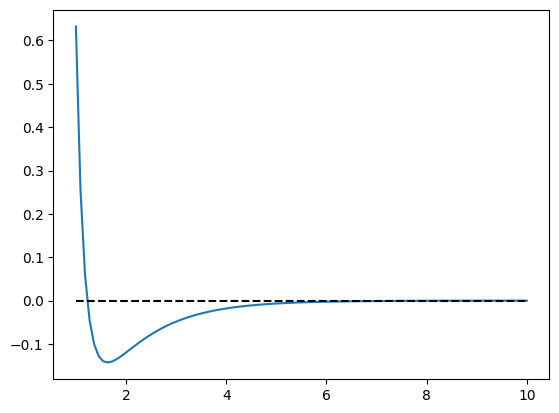

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 1

def potential(r):
  return (sigma/r)**6 - np.exp(-r/sigma)

r = np.linspace(1,10,100)
plt.plot(r,potential(r))
plt.plot([1,10],[0,0],'k--')
plt.show()

In [ ]:

from math import exp,sqrt

# Constants
sigma = 1.0             # Value of sigma in nm
accuracy = 1e-6         # Required accuracy in nm
z = (1+sqrt(5))/2       # Golden ratio

# Function to calculate the Buckingham potential
def f(r):
    return (sigma/r)**6 - exp(-r/sigma)

# Initial positions of the four points
x1 = sigma/10
x4 = sigma*10
x2 = x4 - (x4-x1)/z
x3 = x1 + (x4-x1)/z

# Initial values of the function at the four points
f1 = f(x1)
f2 = f(x2)
f3 = f(x3)
f4 = f(x4)

# Main loop of the search process
while x4-x1>accuracy:
    if f2<f3:
        x4,f4 = x3,f3
        x3,f3 = x2,f2
        x2 = x4 - (x4-x1)/z
        f2 = f(x2)
    else:
        x1,f1 = x2,f2
        x2,f2 = x3,f3
        x3 = x1 + (x4-x1)/z
        f3 = f(x3)

# Print the result
print("The minimum falls at",0.5*(x1+x4),"nm")

The minimum falls at 1.630516067174875 nm


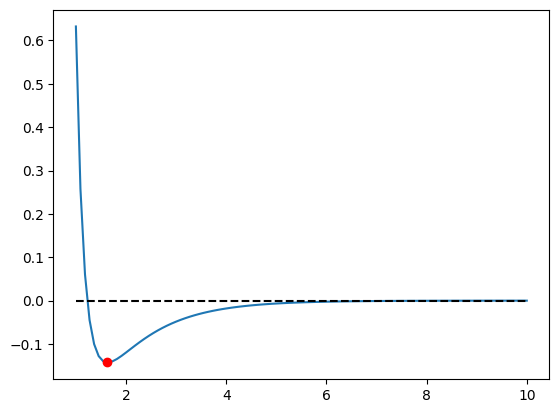

In [ ]:
r = np.linspace(1,10,100)
plt.plot(r,potential(r))
plt.plot([1,10],[0,0],'k--')
rmin = 0.5*(x1+x4)
plt.plot(rmin,potential(rmin),ls='',marker='o',color='r')
plt.show()

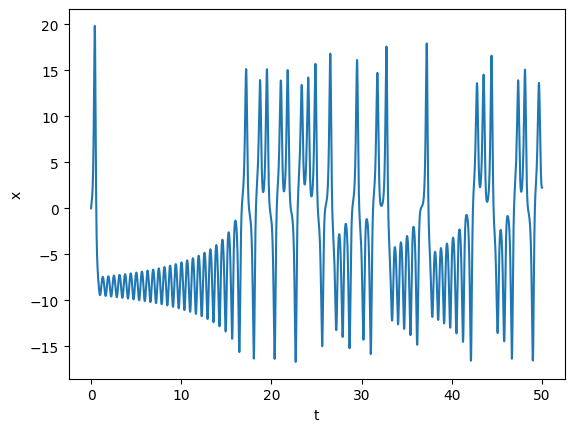

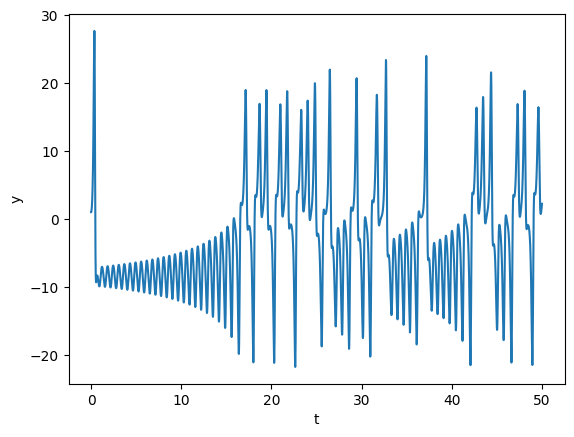

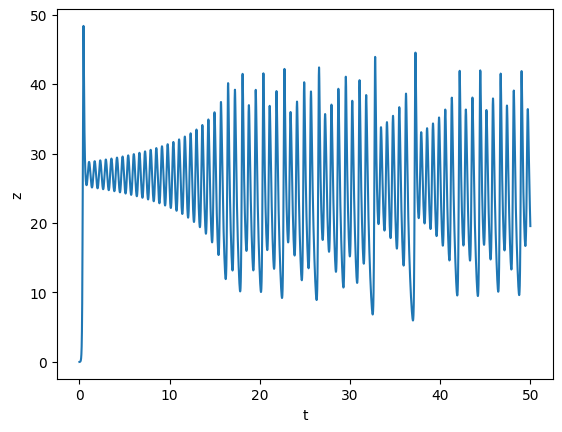

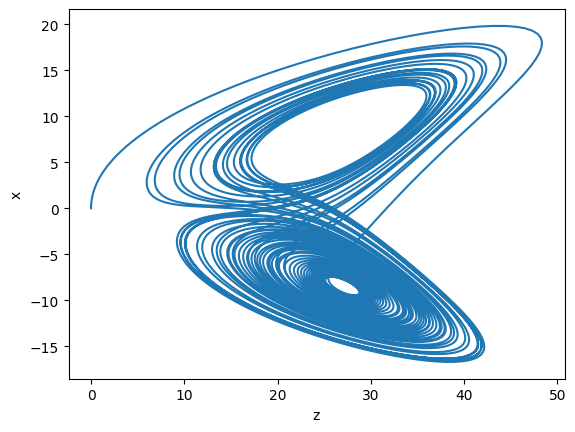

In [ ]:
from math import sin
from numpy import array,arange
from pylab import plot,xlabel,ylabel,show

sigma_ = 10
r_ = 28
b_ = 8/3

def f(r,t):
    x = r[0]
    y = r[1]
    z = r[2]
    fx = sigma_*(y-x)
    fy = r_*x - y - x*z
    fz = x*y - b_*z
    return array([fx,fy,fz],float)

a = 0.0
b = 50.0
N = 10000
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
ypoints = []
zpoints = []

r = array([0,1,0],float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    zpoints.append(r[2])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6

plot(tpoints,xpoints)
xlabel("t")
ylabel("x")
show()

plot(tpoints,ypoints)
xlabel("t")
ylabel("y")
show()

plot(tpoints,zpoints)
xlabel("t")
ylabel("z")
show()

plot(zpoints,xpoints)
xlabel('z')
ylabel('x')
show()